In [1]:
import pandas as pd
import os
import requests
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from timeit import default_timer as timer
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# create data folder
data_folder = 'data'

In [3]:
# read twitter archive data into dataframe
df_archive = pd.read_csv(data_folder + '/twitter-archive-enhanced.csv')

In [4]:
# download image-predictions file and store in data_folder
if not os.path.exists(data_folder):
    os.makedirs(data_folder)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
# save in file
with open(os.path.join(data_folder, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [5]:
# make sure both files are present
os.listdir(data_folder)

['twitter-archive-enhanced.csv',
 '.DS_Store',
 '.ipynb_checkpoints',
 'image-predictions.tsv',
 'tweet_json.txt']

In [6]:
# twitter API
auth = tweepy.OAuthHandler('HIDDEN', 'HIDDEN')
auth.set_access_token('HIDDEN', 'HIDDEN')
api = tweepy.API(auth)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
# store twitter ids 
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

2356

In [8]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open(data_folder +'/tweet_json.txt', 'a+', encoding='utf-8') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            #print("Success")
            json.dump(tweet._json, outfile)
            #outfile.write(json.dumps(tweet))
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
outfile.close()

1: 892420643555336193
2: 892177421306343426
3: 891815181378084864
4: 891689557279858688
5: 891327558926688256
6: 891087950875897856
7: 890971913173991426
8: 890729181411237888
9: 890609185150312448
10: 890240255349198849
11: 890006608113172480
12: 889880896479866881
13: 889665388333682689
14: 889638837579907072
15: 889531135344209921
16: 889278841981685760
17: 888917238123831296
18: 888804989199671297
19: 888554962724278272
20: 888202515573088257
Fail
21: 888078434458587136
22: 887705289381826560
23: 887517139158093824
24: 887473957103951883
25: 887343217045368832
26: 887101392804085760
27: 886983233522544640
28: 886736880519319552
29: 886680336477933568
30: 886366144734445568
31: 886267009285017600
32: 886258384151887873
33: 886054160059072513
34: 885984800019947520
35: 885528943205470208
36: 885518971528720385
37: 885311592912609280
38: 885167619883638784
39: 884925521741709313
40: 884876753390489601
41: 884562892145688576
42: 884441805382717440
43: 884247878851493888
44: 88416267058

344: 832040443403784192
345: 832032802820481025
346: 831939777352105988
347: 831926988323639298
348: 831911600680497154
349: 831670449226514432
350: 831650051525054464
351: 831552930092285952
352: 831322785565769729
353: 831315979191906304
354: 831309418084069378
355: 831262627380748289
356: 830956169170665475
357: 830583320585068544
358: 830173239259324417
359: 830097400375152640
360: 829878982036299777
361: 829861396166877184
362: 829501995190984704
363: 829449946868879360
364: 829374341691346946
Fail
365: 829141528400556032
366: 829011960981237760
367: 828801551087042563
368: 828770345708580865
369: 828708714936930305
370: 828650029636317184
371: 828409743546925057
372: 828408677031882754
373: 828381636999917570
374: 828376505180889089
375: 828372645993398273
376: 828361771580813312
377: 828046555563323392
378: 828011680017821696
379: 827933404142436356
380: 827653905312006145
381: 827600520311402496
382: 827324948884643840
383: 827228250799742977
Fail
384: 827199976799354881
385: 8

685: 788178268662984705
686: 788150585577050112
687: 788070120937619456
688: 788039637453406209
689: 787810552592695296
690: 787717603741622272
691: 787397959788929025
692: 787322443945877504
693: 787111942498508800
694: 786963064373534720
695: 786729988674449408
696: 786709082849828864
697: 786664955043049472
698: 786595970293370880
699: 786363235746385920
700: 786286427768250368
701: 786233965241827333
702: 786051337297522688
703: 786036967502913536
704: 785927819176054784
705: 785872687017132033
706: 785639753186217984
707: 785533386513321988
708: 785515384317313025
709: 785264754247995392
710: 785170936622350336
711: 784826020293709826
712: 784517518371221505
713: 784431430411685888
714: 784183165795655680
715: 784057939640352768
716: 783839966405230592
717: 783821107061198850
718: 783695101801398276
719: 783466772167098368
720: 783391753726550016
721: 783347506784731136
722: 783334639985389568
723: 783085703974514689
724: 782969140009107456
725: 782747134529531904
726: 78272259879

1025: 746507379341139972
1026: 746369468511756288
1027: 746131877086527488
1028: 746056683365994496
1029: 745789745784041472
1030: 745712589599014916
1031: 745433870967832576
1032: 745422732645535745
1033: 745314880350101504
1034: 745074613265149952
1035: 745057283344719872
1036: 744995568523612160
1037: 744971049620602880
1038: 744709971296780288
1039: 744334592493166593
1040: 744234799360020481
1041: 744223424764059648
1042: 743980027717509120
1043: 743895849529389061
1044: 743835915802583040
1045: 743609206067040256
1046: 743595368194129920
1047: 743545585370791937
1048: 743510151680958465
1049: 743253157753532416
1050: 743222593470234624
1051: 743210557239623680
1052: 742534281772302336
1053: 742528092657332225
1054: 742465774154047488
1055: 742423170473463808
1056: 742385895052087300
1057: 742161199639494656
1058: 742150209887731712
1059: 741793263812808706
1060: 741743634094141440
1061: 741438259667034112
1062: 741303864243200000
1063: 741099773336379392
1064: 741067306818797568


1353: 703774238772166656
1354: 703769065844768768
1355: 703631701117943808
1356: 703611486317502464
1357: 703425003149250560
1358: 703407252292673536
1359: 703382836347330562
1360: 703356393781329922
1361: 703268521220972544
1362: 703079050210877440
1363: 703041949650034688
1364: 702932127499816960
1365: 702899151802126337
1366: 702684942141153280
1367: 702671118226825216
1368: 702598099714314240
1369: 702539513671897089
1370: 702332542343577600
1371: 702321140488925184
1372: 702276748847800320
1373: 702217446468493312
1374: 701981390485725185
1375: 701952816642965504
1376: 701889187134500865
1377: 701805642395348998
1378: 701601587219795968
1379: 701570477911896070
1380: 701545186879471618
1381: 701214700881756160
1382: 700890391244103680
1383: 700864154249383937
1384: 700847567345688576
1385: 700796979434098688
1386: 700747788515020802
1387: 700518061187723268
1388: 700505138482569216
1389: 700462010979500032
1390: 700167517596164096
1391: 700151421916807169
1392: 700143752053182464


1681: 682003177596559360
1682: 681981167097122816
1683: 681891461017812993
1684: 681694085539872773
1685: 681679526984871937
1686: 681654059175129088
1687: 681610798867845120
1688: 681579835668455424
1689: 681523177663676416
1690: 681340665377193984
1691: 681339448655802368
1692: 681320187870711809
1693: 681302363064414209
1694: 681297372102656000
1695: 681281657291280384
1696: 681261549936340994
1697: 681242418453299201
1698: 681231109724700672
1699: 681193455364796417
1700: 680970795137544192
1701: 680959110691590145
1702: 680940246314430465
1703: 680934982542561280
1704: 680913438424612864
1705: 680889648562991104
1706: 680836378243002368
1707: 680805554198020098
1708: 680801747103793152
1709: 680798457301471234
1710: 680609293079592961
1711: 680583894916304897
1712: 680497766108381184
1713: 680494726643068929
1714: 680473011644985345
1715: 680440374763077632
1716: 680221482581123072
1717: 680206703334408192
1718: 680191257256136705
1719: 680176173301628928
1720: 680161097740095489


2009: 672256522047614977
2010: 672254177670729728
2011: 672248013293752320
2012: 672245253877968896
2013: 672239279297454080
2014: 672231046314901505
2015: 672222792075620352
2016: 672205392827572224
2017: 672169685991993344
2018: 672160042234327040
2019: 672139350159835138
2020: 672125275208069120
2021: 672095186491711488
2022: 672082170312290304
2023: 672068090318987265
2024: 671896809300709376
2025: 671891728106971137
2026: 671882082306625538
2027: 671879137494245376
2028: 671874878652489728
2029: 671866342182637568
2030: 671855973984772097
2031: 671789708968640512
2032: 671768281401958400
2033: 671763349865160704
2034: 671744970634719232
2035: 671743150407421952
2036: 671735591348891648
2037: 671729906628341761
2038: 671561002136281088
2039: 671550332464455680
2040: 671547767500775424
2041: 671544874165002241
2042: 671542985629241344
2043: 671538301157904385
2044: 671536543010570240
2045: 671533943490011136
2046: 671528761649688577
2047: 671520732782923777
2048: 671518598289059840


2337: 666273097616637952
2338: 666268910803644416
2339: 666104133288665088
2340: 666102155909144576
2341: 666099513787052032
2342: 666094000022159362
2343: 666082916733198337
2344: 666073100786774016
2345: 666071193221509120
2346: 666063827256086533
2347: 666058600524156928
2348: 666057090499244032
2349: 666055525042405380
2350: 666051853826850816
2351: 666050758794694657
2352: 666049248165822465
2353: 666044226329800704
2354: 666033412701032449
2355: 666029285002620928
2356: 666020888022790149
2051.879516223
{888202515573088257: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 873697596434513921: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 872668790621863937: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 872261713294495745: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 869988702071779329: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 866816280283807744:

In [9]:
# number of tweets failed to download
len(fails_dict)

25

In [10]:
# open tweet_json.txt and extract tweet data line by line
with open(data_folder +'/tweet_json.txt') as file:
    tweet_list = []
    for line in file:
        tweet_list.append(json.loads(line))

In [11]:
# create tweet dataframe
df_tweet = pd.DataFrame(tweet_list)

### Table `archive`

In [12]:
# look at the data
df_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1434,697270446429966336,nan,nan,2016-02-10 04:06:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bentley. He got stuck on his 3rd homew...,nan,nan,NaN,https://twitter.com/dog_rates/status/697270446...,10,10,Bentley,None,None,None,None
1812,676811746707918848,nan,nan,2015-12-15 17:11:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Penny &amp; Gizmo. They are pract...,nan,nan,NaN,https://twitter.com/dog_rates/status/676811746...,9,10,Penny,None,None,None,None
2213,668567822092664832,nan,nan,2015-11-22 23:12:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Marvin. He can tie a bow tie better th...,nan,nan,NaN,https://twitter.com/dog_rates/status/668567822...,11,10,Marvin,None,None,None,None
1124,730211855403241472,nan,nan,2016-05-11 01:44:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ziva. She doesn't know how her collar ...,nan,nan,NaN,https://twitter.com/dog_rates/status/730211855...,11,10,Ziva,None,None,None,None
1493,692752401762250755,nan,nan,2016-01-28 16:53:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Hello yes could I get one pupper to go please...",nan,nan,NaN,https://twitter.com/dog_rates/status/692752401...,13,10,None,None,None,pupper,None
85,876120275196170240,nan,nan,2017-06-17 16:52:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Venti, a seemingly caffeinated puppoccino...",nan,nan,NaN,https://twitter.com/dog_rates/status/876120275...,13,10,Venti,None,None,None,None
528,808501579447930884,nan,nan,2016-12-13 02:39:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He dug a hole and then sat in it...,nan,nan,NaN,https://twitter.com/dog_rates/status/808501579...,12,10,Koda,None,None,None,None
904,758355060040593408,nan,nan,2016-07-27 17:35:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Corey. He's a Portobello Corgicool. Tr...,nan,nan,NaN,https://twitter.com/dog_rates/status/758355060...,11,10,Corey,None,None,None,None
953,751830394383790080,nan,nan,2016-07-09 17:28:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's very camera shy. 12/10 wo...,nan,nan,NaN,https://twitter.com/dog_rates/status/751830394...,12,10,Tucker,None,None,None,None
1771,678334497360859136,nan,nan,2015-12-19 22:02:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rosie. She has a snazzy bow tie and a ...,nan,nan,NaN,https://twitter.com/dog_rates/status/678334497...,10,10,Rosie,None,None,None,None


In [13]:
# look at datatypes and features with missing values
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
# look at descriptive statistics
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2356.00,78.00,78.00,181.00,181.00,2356.00,2356.00
mean,742771590321719808.00,745507917855750656.00,20141706360873208.00,772039961038007040.00,12416983653017580.00,13.13,10.46
std,68567047444761032.00,75824920044192880.00,125279666255236320.00,62369278105055600.00,95992535331517536.00,45.88,6.75
min,666020888022790144.00,665814696700723200.00,11856342.00,666104133288665088.00,783214.00,0.00,0.00
25%,678398938214475776.00,675741911993464832.00,308637448.75,718631497683582976.00,4196983835.00,10.00,10.00
50%,719627934716235776.00,703870840226598912.00,4196983835.00,780465709297995776.00,4196983835.00,11.00,10.00
75%,799337304954252288.00,825780371286566912.00,4196983835.00,820314633777061888.00,4196983835.00,12.00,10.00
max,892420643555336192.00,886266357075128320.00,840547864354918400.00,887473957103951872.00,787461778435289088.00,1776.00,170.00


#### Observation: rating_numerator and rating_denominator has outliers like 1776 and 170. Needs to be addressed during data cleaning.

In [15]:
# finding any duplicate rows
sum(df_archive['tweet_id'].duplicated())
# no duplicate row found

0

In [16]:
# Visual inspection found few tweets contains decimal ratings.
df_archive.iloc[695].text

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

In [17]:
# find number of rating_denominator which are not 10
len(df_archive[df_archive.rating_denominator != 10])

23

### Table `image`

In [18]:
# read imgae data and create dataframe
df_image = pd.read_csv(data_folder + '/image-predictions.tsv', sep='\t')

In [19]:
# initial look at data
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.47,True,collie,0.16,True,Shetland_sheepdog,0.06,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.51,True,miniature_pinscher,0.07,True,Rhodesian_ridgeback,0.07,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.60,True,malinois,0.14,True,bloodhound,0.12,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.41,True,redbone,0.36,True,miniature_pinscher,0.22,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.56,True,Rottweiler,0.24,True,Doberman,0.15,True


In [20]:
# looking for datatypes and missing values
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
# finding any duplicate rows
sum(df_image.duplicated())
# no duplicate row found

0

### Table `tweet`

In [22]:
# look at the column datatypes
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
created_at                       2331 non-null object
id                               2331 non-null int64
id_str                           2331 non-null object
full_text                        2331 non-null object
truncated                        2331 non-null bool
display_text_range               2331 non-null object
entities                         2331 non-null object
extended_entities                2059 non-null object
source                           2331 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null object
in_reply_to_screen_name          77 non-null object
user                             2331 non-null object
geo                              0 non-null object
coordinates                      0 non-null

In [23]:
# initial look ate data
df_tweet.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",nan,...,False,False,False,False,en,NaN,nan,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",nan,...,False,False,False,False,en,NaN,nan,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",nan,...,False,False,False,False,en,NaN,nan,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",nan,...,False,False,False,False,en,NaN,nan,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",nan,...,False,False,False,False,en,NaN,nan,NaN,NaN,NaN


In [24]:
# check we're not missing tweets other than failed ones (25)
len(df_archive) - (len(df_tweet) + len(fails_dict)) == 0

True

In [25]:
# check for any duplicated tweets
sum(df_tweet['id'].duplicated())

0

## Quality

### `archive table` 
- rating_numerator and rating_denominator must be of float datatype instead of int
- numerator decimal ratings are not extracted for ex: 9.75 for tweet (786709082849828864)
- Replace incorrect denominator values other than 10
- wrong detection of dog names like 'a', the, very and None to `Nan`
- Erroneous datatypes for (tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_user_id) must be string
- timestamp contains utc hrs +0000 redundant information
- timestamp and retweeted_status_timestamp must be of datetime
- remove outliers in normalized dog_ratings columns

### `images` table
- tweet_id must be of string datatype

### `twitter`
- Erroneous datatype for (id, in_reply_to_status_id, in_reply_to_user_id) must be string

## Tidiness
- Table `archive`: Create dog_ratings column to normalize ratings
- Table `archive`: Dog stages columns can be merged into single column dog_breed
- Merge all twitter data sources into one table

### Filter and Copy
Table `archive`: Filter out retweets and create archive data copy

In [26]:
# filter retweets
df_archive = df_archive[pd.isnull(df_archive['retweeted_status_id']) & (pd.isnull(df_archive['retweeted_status_user_id'])) & (pd.isnull(df_archive['retweeted_status_timestamp']))]
df_archive.shape

(2175, 17)

In [27]:
# create clean copy of archive data
df_archive_clean = df_archive.copy()
df_image_clean = df_image.copy()
tweet_clean = df_tweet.copy()

### Define
Table `archive`: Change datatype of rating_numerator and rating_denominator to float

### Code

In [28]:
# change datatype to float
df_archive_clean['rating_numerator'] = df_archive_clean['rating_numerator'].astype(float)
df_archive_clean['rating_denominator'] = df_archive_clean['rating_denominator'].astype(float)

### Test

In [29]:
# verify rating_numerator and rating_denominator have float datatype
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null float64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(6), int64(1), obje

### Define
Table `archive`: Re-extract dog ratings to accomodate decimal values 

### Code

In [30]:
# re-extract text again to include decimal ratings
rating_df = df_archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating_df.columns = ['rating_numerator', 'rating_denominator']
rating_df['rating_numerator'] = rating_df['rating_numerator'].astype(float)
rating_df['rating_denominator'] = rating_df['rating_denominator'].astype(float)

In [31]:
# replace df_archive rating_numerator and rating_denominator with re-extracted values
df_archive_clean['rating_numerator'] = rating_df['rating_numerator']
df_archive_clean['rating_denominator'] = rating_df['rating_denominator']

### Test

In [32]:
# check decimal rating is correctly extracted from one of the tweet detected during visual inspection above
df_archive_clean.loc[695]['rating_numerator']

9.75

### Define
Table `archive`: Replace denominator rating to 10 which are not equal to 10

In [33]:
# replace rating_denominator that are not 10
df_archive_clean['rating_denominator'].mask(df_archive_clean['rating_denominator'] != 10, 10, inplace=True)

### Test

In [34]:
# no rows return that have rating_denominator other than 10
df_archive_clean[df_archive_clean.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Define
Table `archive`:
- Replace incorrect names like 'a', the, very etc with NAN
- Replace None to Nan

### Code

In [35]:
# replace lower dog names with Nan
mask = df_archive_clean.name.str.islower()
df_archive_clean.loc[mask, 'name'] = np.nan

In [36]:
# replace None names with Nan
mask_none = df_archive_clean.name == 'None'
df_archive_clean.loc[mask_none, 'name'] = np.nan

### Test

In [37]:
# check no name is in lower case
sum(df_archive_clean.name.str.islower() > 0), sum(df_archive_clean.name == 'None')

(0, 0)

### Define
Table `archive`: change datatype of tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id to string

### Code

In [38]:
# change datatype to string
df_archive_clean['tweet_id'] = df_archive_clean['tweet_id'].astype(str)
df_archive_clean['in_reply_to_status_id'] = df_archive_clean['in_reply_to_status_id'].astype(str)
df_archive_clean['in_reply_to_user_id'] = df_archive_clean['in_reply_to_user_id'].astype(str)
df_archive_clean['retweeted_status_id'] = df_archive_clean['retweeted_status_id'].astype(str)
df_archive_clean['retweeted_status_user_id'] = df_archive_clean['retweeted_status_user_id'].astype(str)

### Test

In [39]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         2175 non-null object
in_reply_to_user_id           2175 non-null object
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           2175 non-null object
retweeted_status_user_id      2175 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null float64
name                          1391 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(2), object(

### Define
Table `archive`: remove redundant utc hrs from timestamp

### Code

In [40]:
# remove +0000 from timestamp
df_archive_clean['timestamp'] = df_archive_clean['timestamp'].apply(lambda x: x.replace('+0000', ''))

### Test

In [41]:
# verify +0000 is removed from timestamp
df_archive_clean.timestamp.sample(5)

642     2016-10-31 22:00:04 
1381    2016-02-20 03:51:05 
1573    2016-01-14 04:41:12 
76      2017-06-23 01:10:23 
1216    2016-03-30 01:07:18 
Name: timestamp, dtype: object

### Define
Table `archive`: change datatype of timestamp and retweeted_status_timestamp to datetime

### Code

In [42]:
# change datatype to datetime
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])
df_archive_clean['retweeted_status_timestamp'] = pd.to_datetime(df_archive_clean['retweeted_status_timestamp'])

### Test

In [43]:
# verify timestamp and retweeted_status_timestamp have datetime datatype
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         2175 non-null object
in_reply_to_user_id           2175 non-null object
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           2175 non-null object
retweeted_status_user_id      2175 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null float64
name                          1391 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: dat

### Tidiness 
#### Note: This step is required here, since we need to remove outliers in dog ratings columns following this.
- Table `archive`:

### Define 
- Create dog_ratings column to normalize ratings

### Code

In [44]:
# create dog_ratings columns by rating_numerator / rating_denominator
df_archive_clean['dog_ratings'] = df_archive_clean.rating_numerator / df_archive_clean.rating_denominator

### Test

In [45]:
# visually confirm the dog_rating values are correctly computed
df_archive_clean[['rating_numerator', 'rating_denominator', 'dog_ratings']]

,rating_numerator,rating_denominator,dog_ratings
0,13.00,10.00,1.30
1,13.00,10.00,1.30
2,12.00,10.00,1.20
3,13.00,10.00,1.30
4,12.00,10.00,1.20
...,...,...,...
2351,5.00,10.00,0.50
2352,6.00,10.00,0.60
2353,9.00,10.00,0.90
2354,7.00,10.00,0.70


### Define
Table `archive`: Remove outliers for 0.0 < dog_ratings <= 1.4

### Code

In [46]:
# find outliers in dog_ratings data
# 95% of dog ratings lies in range (0.0 < dog_ratings <= 1.4)
df_archive_clean.dog_ratings.describe()

count   2175.00
mean       1.32
std        4.77
min        0.00
25%        1.00
50%        1.10
75%        1.20
max      177.60
Name: dog_ratings, dtype: float64

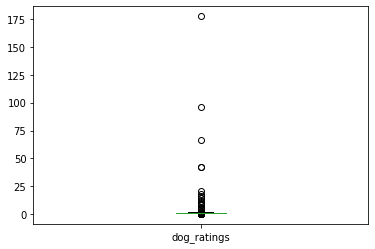

In [47]:
# box plot for dog_ratings
df_archive_clean.dog_ratings.plot(kind='box');

In [48]:
# find outlier count
df_archive_clean.query("dog_ratings <= 0.0 or dog_ratings > 1.4")['dog_ratings'].size

25

In [49]:
# filter outliers
df_archive_clean = df_archive_clean.query("dog_ratings > 0.0 & dog_ratings <= 1.4")

### Test

In [50]:
# check all outliers are removed and verify number of records left in archive table
len(df_archive_clean.query("dog_ratings <= 0.0 or dog_ratings > 1.4") == 0), df_archive_clean.shape

(0, (2150, 18))

#### Note: 25 outlier records are removed from archive table 

### Define
table `image`: change datatype of tweet_id to string

### Code

In [51]:
# change datatype to string
df_image_clean['tweet_id'] = df_image_clean['tweet_id'].astype(str)

### Test

In [52]:
# verify tweet_id datatype is string
df_image_clean.tweet_id.dtype

dtype('O')

### Define
Table `twitter`: change datatype of id, in_reply_to_status_id, in_reply_to_user_id to string

### Code

In [53]:
# change datatype to string
tweet_clean['id'] = tweet_clean['id'].astype(str)
tweet_clean['in_reply_to_status_id'] = tweet_clean['in_reply_to_status_id'].astype(str)
tweet_clean['in_reply_to_user_id'] = tweet_clean['in_reply_to_user_id'].astype(str)

### Test

In [54]:
# verify column datatypes
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
created_at                       2331 non-null object
id                               2331 non-null object
id_str                           2331 non-null object
full_text                        2331 non-null object
truncated                        2331 non-null bool
display_text_range               2331 non-null object
entities                         2331 non-null object
extended_entities                2059 non-null object
source                           2331 non-null object
in_reply_to_status_id            2331 non-null object
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              2331 non-null object
in_reply_to_user_id_str          77 non-null object
in_reply_to_screen_name          77 non-null object
user                             2331 non-null object
geo                              0 non-null object
coordinates                      0 non-n

## Tidiness

### Define
Table `archive`: Create new column dog_breed by merging doggo, floofer, pupper and puppo 

### Code

In [55]:
# define function to return dog stage
def label_stage(row):
    if row['doggo'] != 'None':
        return 'doggo'
    elif row['floofer'] != 'None':
        return 'floofer'
    elif row['pupper'] != 'None':
        return 'pupper'
    elif row['puppo'] != 'None':
        return 'puppo'
    else: 
        return np.nan

In [56]:
# call label_stage function
df_archive_clean['dog_stage'] = df_archive_clean.apply(lambda row: label_stage(row), axis=1)

### Test

In [57]:
# check original archive data having pupper as dog stage matches with new dog_stage value
df_archive_clean[df_archive_clean.tweet_id == '673612854080196609']['dog_stage'] == df_archive[df_archive.tweet_id == 673612854080196609]['pupper']

1956    True
dtype: bool

### Define
Merge all twitter data sources into one table

### Code

In [58]:
# drop columns not used for analysis from archive
df_archive_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

In [59]:
# drop columns not used for analysis from image table
df_image_clean.drop(columns=['img_num', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], inplace=True)

In [60]:
# get tweet columns used for analysis from twitter table
df_tweet_clean = tweet_clean[['id','favorite_count', 'retweet_count']]

In [61]:
# verify 
df_tweet_clean.head()

,id,favorite_count,retweet_count
0,892420643555336193,35814,7575
1,892177421306343426,30907,5616
2,891815181378084864,23252,3715
3,891689557279858688,39057,7748
4,891327558926688256,37301,8352


### Merge

In [62]:
twitter_archive_master = df_archive_clean.merge(df_image_clean, how='inner', left_on='tweet_id', right_on='tweet_id').merge(df_tweet_clean, how='inner', left_on='tweet_id', right_on='id')

In [63]:
# check merge data columns
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1968
Data columns (total 15 columns):
tweet_id              1969 non-null object
timestamp             1969 non-null datetime64[ns]
text                  1969 non-null object
rating_numerator      1969 non-null float64
rating_denominator    1969 non-null float64
name                  1340 non-null object
dog_ratings           1969 non-null float64
dog_stage             305 non-null object
jpg_url               1969 non-null object
p1                    1969 non-null object
p1_conf               1969 non-null float64
p1_dog                1969 non-null bool
id                    1969 non-null object
favorite_count        1969 non-null int64
retweet_count         1969 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(4), int64(2), object(7)
memory usage: 232.7+ KB


In [64]:
# drop column not relevant for analysis
twitter_archive_master.drop(columns=['id', 'rating_numerator', 'rating_denominator'], inplace=True)

In [65]:
# set tweet_id as index for master dataframe
twitter_archive_master = twitter_archive_master.set_index('tweet_id')

In [66]:
# reindex column names
twitter_archive_master = twitter_archive_master.reindex(columns=['timestamp', 'text', 'name', 'dog_stage', 'dog_ratings', 'favorite_count','retweet_count', 'p1', 'p1_conf', 'p1_dog', 'jpg_url'])

### Test

In [67]:
# verify all relevant columns with correct datatype are present in master dataframe
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1969 entries, 892420643555336193 to 666020888022790149
Data columns (total 11 columns):
timestamp         1969 non-null datetime64[ns]
text              1969 non-null object
name              1340 non-null object
dog_stage         305 non-null object
dog_ratings       1969 non-null float64
favorite_count    1969 non-null int64
retweet_count     1969 non-null int64
p1                1969 non-null object
p1_conf           1969 non-null float64
p1_dog            1969 non-null bool
jpg_url           1969 non-null object
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 171.1+ KB


In [68]:
# store master dataframe in CSV
twitter_archive_master.to_csv(data_folder + '/twitter_archive_master.csv')

## Exploratory Data Analysis

In [69]:
# read twitter master data
df = pd.read_csv('data/twitter_archive_master.csv')

In [70]:
# descriptive statistics
df.describe()

,tweet_id,dog_ratings,favorite_count,retweet_count,p1_conf
count,1969.00,1969.00,1969.00,1969.00,1969.00
mean,735699193748085888.00,1.05,8198.54,2425.20,0.59
std,67531525959916304.00,0.22,12078.50,4342.24,0.27
min,666020888022790144.00,0.10,70.00,11.00,0.04
25%,675740360753160192.00,1.00,1738.00,539.00,0.36
50%,708130923141795840.00,1.10,3711.00,1173.00,0.59
75%,787717603741622272.00,1.20,10204.00,2757.00,0.84
max,892420643555336192.00,1.40,154216.00,76526.00,1.00


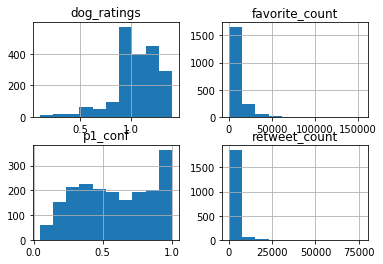

In [71]:
# distribution plots
df[['dog_ratings', 'favorite_count', 'retweet_count', 'p1_conf']].hist();

In [72]:
# finding correlation
df.corr()

,tweet_id,dog_ratings,favorite_count,retweet_count,p1_conf,p1_dog
tweet_id,1.00,0.54,0.61,0.38,0.10,0.12
dog_ratings,0.54,1.00,0.39,0.29,0.10,0.28
favorite_count,0.61,0.39,1.00,0.93,0.07,0.05
retweet_count,0.38,0.29,0.93,1.00,0.05,0.00
p1_conf,0.10,0.10,0.07,0.05,1.00,0.13
p1_dog,0.12,0.28,0.05,0.00,0.13,1.00


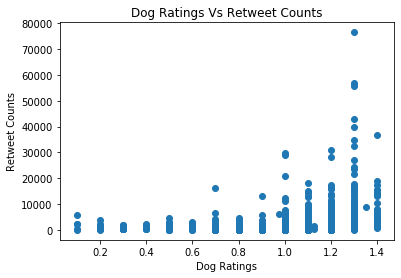

In [73]:
# scatter plot between dog_ratings and retweet counts
plt.scatter(x=df['dog_ratings'], y = df['retweet_count']);
plt.title('Dog Ratings Vs Retweet Counts')
plt.xlabel('Dog Ratings')
plt.ylabel('Retweet Counts')
plt.show();

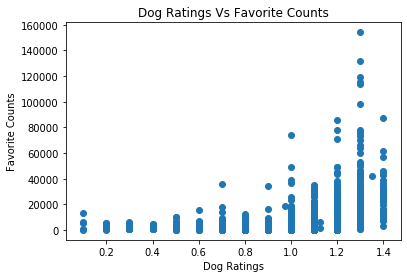

In [74]:
# scatter plot between dog_ratings and favorite counts
plt.scatter(x=df['dog_ratings'], y = df['favorite_count']);
plt.title('Dog Ratings Vs Favorite Counts')
plt.xlabel('Dog Ratings')
plt.ylabel('Favorite Counts')
plt.show();

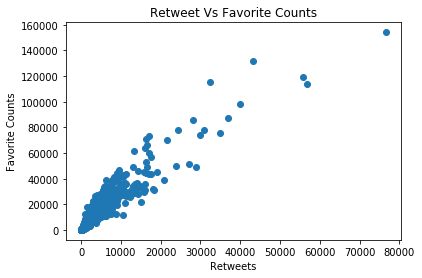

In [75]:
# scatter plot between retweet and favorite counts
plt.scatter(x=df['retweet_count'], y = df['favorite_count']);
plt.title('Retweet Vs Favorite Counts')
plt.xlabel('Retweets')
plt.ylabel('Favorite Counts')
plt.show();

### General Observations
- Dog Ratings are left skewed.
- Majority of dog ratings falls between (1.0 to 1.2) range
- Dog ratings are positively correlated with favorite and retweet count
- High prediction rate for majority of tweets
- Few tweets have very high favourite and retweet counts 

### Q1. What are the most commom Dog names?

In [76]:
# find Top 10 dog names
df.name.value_counts().nlargest(10)

Oliver     10
Charlie    10
Cooper     10
Tucker      9
Penny       9
Lucy        9
Sadie       8
Winston     8
Daisy       7
Toby        7
Name: name, dtype: int64

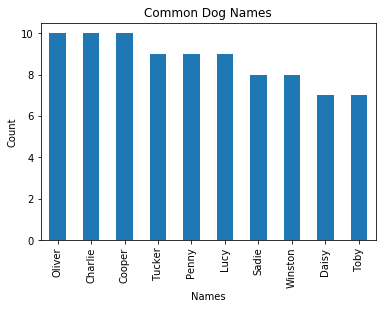

In [77]:
# count plot for Top 10 dog names
ax = df['name'].value_counts().nlargest(10).plot(kind='bar', title='Common Dog Names');
ax.set_xlabel('Names')
ax.set_ylabel('Count')
plt.show;

### Observation: Cooper, Charlie and Oliver are most common dog names

### Q2. Which Dogs are most tweeted?

In [78]:
# find unique dog counts by stage
df['dog_stage'].value_counts()

pupper     203
doggo       73
puppo       22
floofer      7
Name: dog_stage, dtype: int64

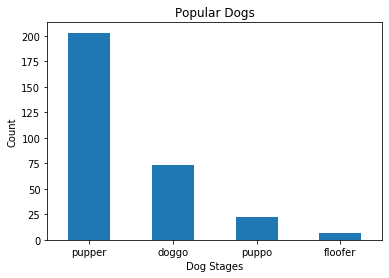

In [79]:
# dog stage count plot
ax = df['dog_stage'].value_counts().plot(kind='bar');
ax.set_title('Popular Dogs' )
ax.set_xticklabels(['pupper', 'doggo', 'puppo', 'floofer'], rotation=0);
ax.set_xlabel('Dog Stages')
ax.set_ylabel('Count')
plt.show;

### Observation: Pupper is most popular dog on WeRateDogs twitter account

### Q3. Which dogs recieves better ratings?

In [80]:
# find 50th percentile for dog_ratings
df.dog_ratings.describe()

count   1969.00
mean       1.05
std        0.22
min        0.10
25%        1.00
50%        1.10
75%        1.20
max        1.40
Name: dog_ratings, dtype: float64

In [81]:
# get avreage high rating
high_rating = df.query("dog_ratings >= 1.1")
high_rating.groupby('dog_stage').mean()['dog_ratings'].sort_values(ascending = False)

dog_stage
puppo     1.25
floofer   1.23
doggo     1.23
pupper    1.18
Name: dog_ratings, dtype: float64

### Observation: Puppo receives highest rating

### Q4. What are favorite dogs?

In [82]:
# get favorite counts by dog stages
fav_counts = df.groupby('dog_stage').median()['favorite_count'].sort_values(ascending = False)
fav_counts

dog_stage
puppo     12193.50
doggo     10792.00
floofer   10073.00
pupper     2925.00
Name: favorite_count, dtype: float64

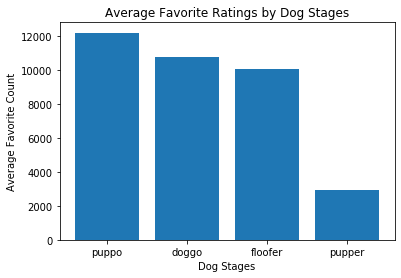

In [83]:
# plot of avrage favorite counts for dogs
x = ['puppo', 'doggo', 'floofer', 'pupper']
heights = fav_counts
plt.bar(x, heights)
plt.title('Average Favorite Ratings by Dog Stages')
plt.xlabel('Dog Stages')
plt.ylabel('Average Favorite Count');

### Observation: Puppo is most favored dog

### Q5. Which dogs gets most retweets?

In [84]:
# Most retweeted dogs?
retweet_counts = df.groupby('dog_stage').median()['retweet_count'].sort_values(ascending = False)

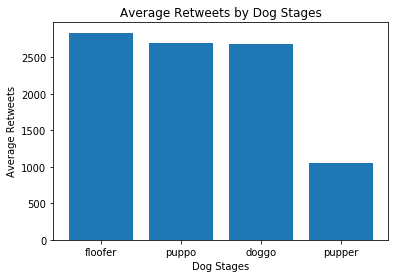

In [85]:
x = ['floofer', 'puppo', 'doggo', 'pupper']
heights = retweet_counts
plt.bar(x, heights)
plt.title('Average Retweets by Dog Stages')
plt.xlabel('Dog Stages')
plt.ylabel('Average Retweets');

### Observation: Floofer has highest average retweets